# Born Machines using Generative Quantum Tensor Networks

* **QHack - 2021 Submission**
* **Team Name - The Racing Scarecrow**
* **Members - Shantom Borah (Arkonaire)**

The objective of this project is to explore generative Born Machines using circuit ansaetze based on Quantum Tensor Networks, as described in [1]. In the following, I shall explore the design of such generative models using two types of tensor networks as the ansatz circuit structure:

1. *Tree Tensor Networks (TTN)*
2. *Matrix Product States (MPS)*

All simulations were performed using the pennylane library [2]. An outline of the various sections in this document is as follows:

1. *Background*  
    1.1. *Born Machines*  
    1.2. *Tensor Network Ansaetze*  
2. *Simulations*  
    2.1. *2x2 Grid - TTN Ansatz*  
    2.2. *2x2 Grid - MPS Ansatz*  
    2.3. *3x4 Grid - TTN Ansatz*  
    2.4. *3x4 Grid - MPS Ansatz*  
3. *Conclusions*  
4. *References*  

## 1. Background
In this section, I shall provide a brief background on Born Machines. I shall begin by providing a general definition of Born Machines, and follow up by describing the target distribution for the Born Machine developed as part of this project, which is the bars and stripes distribution. Following that, I shall describe the circuit ansaetze used in this project. The simulation results shall be described in the next section.

#### 1.1. Born Machines
Born Machines are essentially quantum systems that replicate certain specific probability distributions via the Born interpretation of Quantum Mechanincs. The Born interpretation essentially says that given a quantum state $|\psi\rangle$, and an orthonormal set $\{|x\rangle\}_{x=0}^N$, a projective measurement into this set may yield any of the outcomes $x$ with probability

$$P(x) = |\langle x|\psi \rangle|^2$$

The state of the system subsequently collapses to the state $|x_0\rangle$, where $x_0$ indicates the outcome of the measurement obtained. From the point of view of quantum circuits, a Born Machine is essentially a parameterized quantum circuit, whose parameters may be tuned to replicate the desired probability distribution. One typically uses a classical optimization loop to generate the parameter set required to replicate the desired distribution.

In this document, we shall explore the use of Born Machines created out of quantum tensor networks based off of a TTN or MPS structure. We shall design the Born Machine to generate the bars and stripes distribution. For the bars and stripes distribution, the circuit shall be required to generate a grid of zeros and ones. The generated grid is said to be valid if and only if it can be described either as a set of horizontal lines of zeros and ones or as a set of vertical lines of zeros and ones. Put another way, either each horizontal row has to contain identical elements or each vertical column has to contain identical elements for the grid to be marked as valid.

The goal of the Born Machine described in this document is to be able to generate valid grids with uniform probability, and invalid grids with zero or minimal probability. We shall achieve this by building a quantum circuit with the structure of a TTN or MPS network and then using a classical optimizer to optimize over the resulting probability distribution.

#### 1.2. Tensor Network Ansaetze
The circuit structure for the ansaetze used in this project is as shown in the following figure (Source: [1]).

![Circuit Ansaetze. Left: TTN. Right: MPS](img/ansaetze.png)

The left side of the above figure shows an ansatz based on the tree tensor network (TTN), while on the left is an ansatz based on Matrix Product States (MPS). Notice the specific structure of the unitary gates depicted by the rectangular boxes above. Each unitary gate acts on two sets of wires. One set of wires come in directly from the input, while the other set may possibly be an output of a previous unitary gate. We refer to each of these sets of wires as a *Virtual Qubit*. In the above figures, each of these two sets of wires contain two qubits each. This number may vary depending on the application at hand. We call this number the *Bond Dimension* of the tensor network. Thus, each *Virtual Qubit* is built out of as many physical qubits as is the *Bond Dimension* of the network, and each unitary gate acts on two *Virtual Qubits* in total.

## 2. Simulation Results
In this section, we shall describe the results of a Born Machine built out of both of these ansaetze, that is tasked with generating a bars and stripes distribution. We shall consider two types of grids, viz a __2x2__ grid and a __3x4__ grid. Due to the considerable training times involved in training the models, we shal simply load the pretrained model and visualize the results. We begin by importing the __bars_and_stripes__ file.

In [1]:
import bars_and_stripes as bsg
%matplotlib inline

#### 2.1. 2x2 Grid - TTN Ansatz

In [2]:
shape = (2, 2)
netstruct = {'bond_v': 2, 'num_qubits': 4, 'network': 'TTN'}
obj_1 = bsg.BarStripeGenerator(shape, netstruct, entanglers=2)

In [3]:
obj_1.load_model()

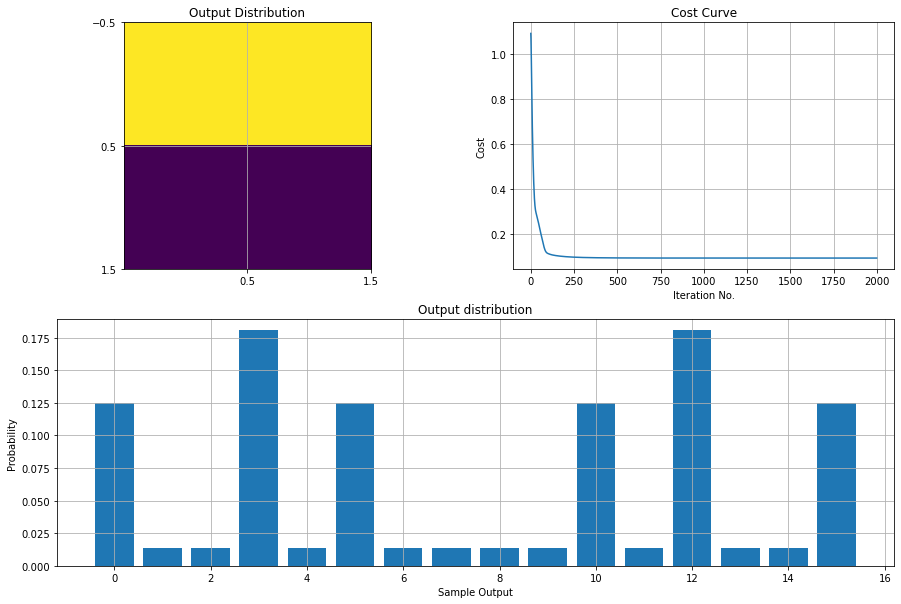

In [4]:
obj_1.visualize()

#### 2.2. 2x2 Grid - MPS Ansatz

In [5]:
shape = (2, 2)
netstruct = {'bond_v': 2, 'num_qubits': 4, 'network': 'MPS'}
obj_2 = bsg.BarStripeGenerator(shape, netstruct, entanglers=2)

In [6]:
obj_2.load_model()

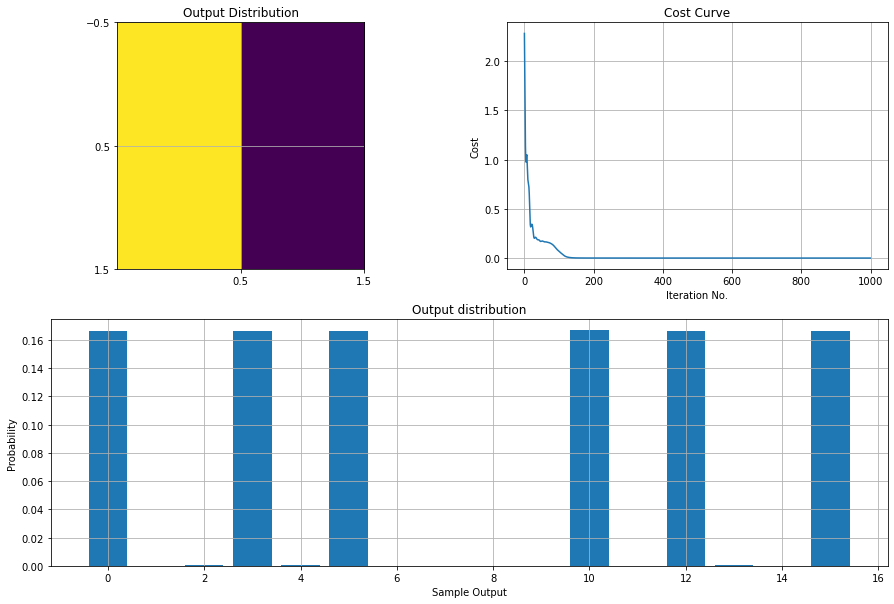

In [7]:
obj_2.visualize()

#### 2.3. 3x4 Grid - TTN Ansatz

In [8]:
shape = (3, 4)
netstruct = {'bond_v': 3, 'num_qubits': 12, 'network': 'TTN'}
obj_3 = bsg.BarStripeGenerator(shape, netstruct, entanglers=2)

In [9]:
obj_3.load_model()

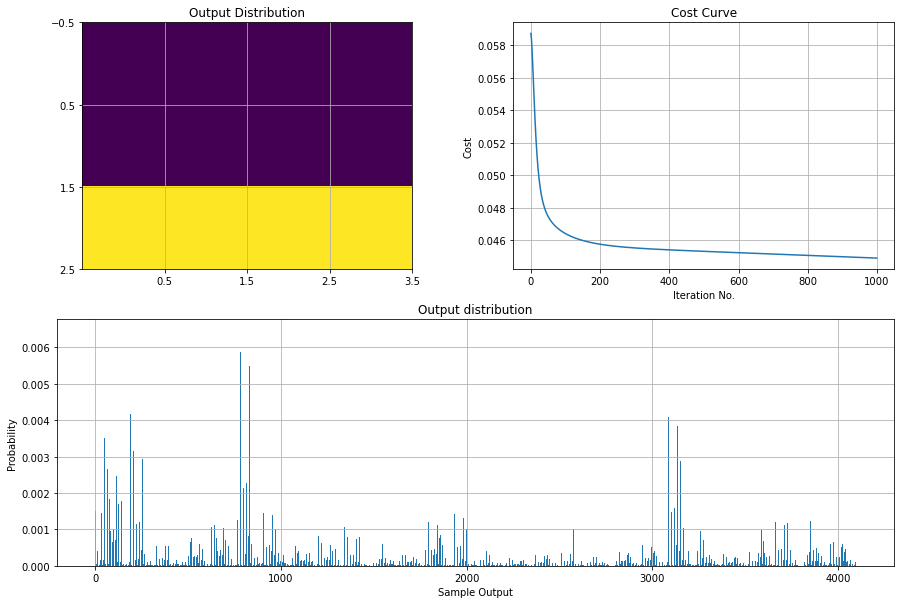

In [10]:
obj_3.visualize()

#### 2.4. 3x4 Grid - MPS Ansatz

In [11]:
shape = (3, 4)
netstruct = {'bond_v': 2, 'num_qubits': 12, 'network': 'MPS'}
obj_4 = bsg.BarStripeGenerator(shape, netstruct, entanglers=2)

In [12]:
obj_4.load_model()

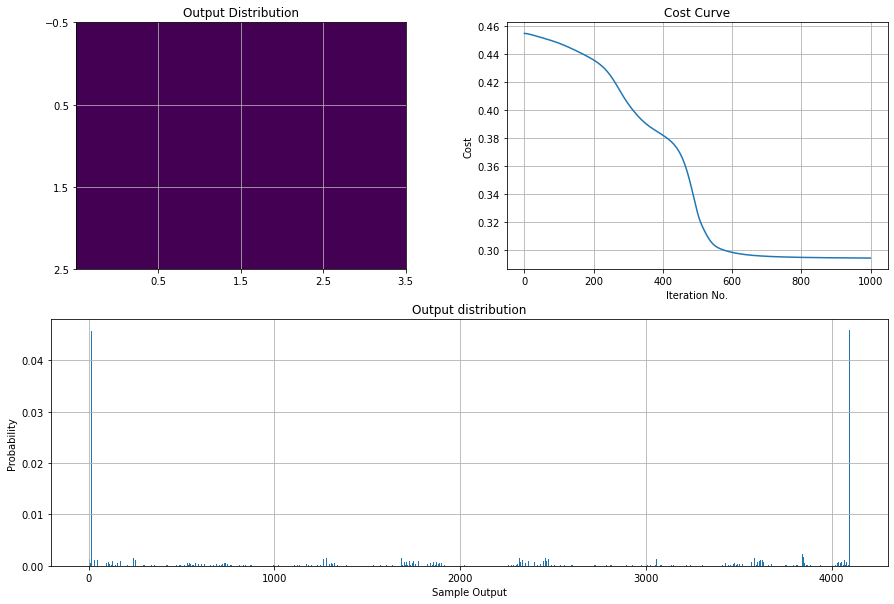

In [13]:
obj_4.visualize()

We see that that the TTN and MPS networks successfully replicate the bars and stripes distribution, especially in the case of the __2x2__ grid. Training times for the above simulations are given as follows.

In [14]:
print("Training Time for TTN 2x2: ", obj_1.runtime, " seconds")
print("Training Time for MPS 2x2: ", obj_2.runtime, " seconds")
print("Training Time for TTN 3x4: ", obj_3.runtime, " seconds")
print("Training Time for MPS 3x4: ", obj_4.runtime, " seconds")

Training Time for TTN 2x2:  77.70944046974182  seconds
Training Time for MPS 2x2:  30.2635178565979  seconds
Training Time for TTN 3x4:  691.054765701294  seconds
Training Time for MPS 3x4:  821.5799202919006  seconds


We see that the MPS states are better able to handle smaller sizes whereas TTN networks work better for larger sizes of output. This is to be expected. Tree Tensor Networks, because of their very structure, are able to generate exponentially larger number of outputs as the number of network layers is sized up. For MPS states, this rise is only linear.

## 3. Conclusions
In this document, I have thus, outlined my attempts to generate the bars and stripes distribution using generative tensor network states. An important concclusion to be drawn from the above analysis is that MPS states often work better for smaller sized outputs while TTN states are preferable for larger outputs. Going further into this field, I intend to explore the performance of these Tensor Network States in discriminative models as well. Further work may also involve exploring the performance of these algorithms under qubit recycle as described in [1], as well as exploration of other variants of tensor networks such as MERA and PEPS. Dynamic simulations of 2D spin states using similar methods offers another avenue for further research.

# 4. References

1. The main paper
2. pennylane website / whatever you cite